# Applied Linear Algebra - Lab 1
Introduction to NumPy, color grading, linear transformation and 3D rotation.


### Contents:

* [Numpy](#Numpy)
* [Arrays](#Arrays)
* [Array Arithmetic](#Array-Arithmetic)
* [Exercise 1](#Exercise-1)
* [NumPy Standard Data Types](#NumPy-Standard-Data-Types)
* [Using array-generating functions](#Using-array-generating-functions)
* [Exercise 2](#Exercise-2)
* [Exercise 3](#Exercise-3)
* [Array Slicing: Accessing Subarrays](#Array-Slicing:-Accessing-Subarrays)
* [Implementing Gaussian Elimination](#Implementing-Gaussian-Elimination) 
* [Exercise 4](#Exercise-4)
* [Exercise 5](#Exercise-5)
* [Exercise 6](#Exercise-6)
* [Color Grading](#Color-Grading)
* [Exercise 7](#Exercise-7)
* [Exercise 8](#Exercise-8)
* [Exercise 9](#Exercise-9)
* [Exercise 10](#Exercise-10)
* [Exercise 11](#Exercise-11)
* [Exercise 12](#Exercise-12)
* [Linear Transformation](#Linear-Transformation)
* [Exercise 13](#Exercise-13)
* [Exercise 14](#Exercise-14)
* [Exercise 15](#Exercise-15)
* [Orthogonal matrices and 3D graphics](#Orthogonal-matrices-and-3D-graphics)
* [Exercise 16](#Exercise-16)
* [Exercise 17](#Exercise-17)
* [Exercise 18](#Exercise-18)
* [Exercise 19](#Exercise-19)




# Numpy

Datasets can be made of collections of images, sounds, videos, documents, numerical measurements, or, really anything. Despite the diversity, it will help us to think of all data fundamentally as arrays of numbers.

| Data type	    | Arrays of Numbers? |
|---------------|-------------|
|Images | Pixel brightness across different channels|
|Videos | Pixels brightness across different channels for each frame | 
|Sound | Intensity over time |
|Numbers | No need for transformation | 
|Tables | Mapping from strings to numbers |


Therefore, the efficient storage and manipulation of large arrays of numbers is really fundamental to the process of doing data science. Numpy is one of the libraries within the scientific stack that specialize in handling numerical arrays and data tables. 

[Numpy](http://www.numpy.org/) is short for _numerical python_, and provides functions that are especially useful when you have to work with large arrays and matrices of numeric data, like matrix multiplications.  

The array object class is the foundation of Numpy, and Numpy arrays are like lists in Python, except that every thing inside an array must be of the same type, like int or float. As a result, arrays provide much more efficient storage and data operations, especially as the arrays grow larger in size. However, in other ways, NumPy arrays are very similar to Python's built-in list type, but with the exception of Vectorization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# to make matplotlib plots interactive in jupyter 
%matplotlib widget
# Global floating point precision
precision = 2

## Arrays
A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The shape of an array is a tuple of integers giving the size of the array along each dimension. A a one dimensional array (shape `(n,)`) corresponds to a vector.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [2]:
a = np.array([1, 2, 3])  # Create a 1 dimensional array i.e. a vector

print("a is type: ", type(a))
print("The shape of the vector a is: ", a.shape)
print(a[0], a[1], a[2])  # indexing
a[0] = 5  # Change an element of the array
print(a)     

a is type:  <class 'numpy.ndarray'>
The shape of the vector a is:  (3,)
1 2 3
[5 2 3]


In [3]:
b = np.array([[1,2,3],[4,5,6]])   # Create a 2 dimensional array i.e. a matrix
print(b)
print("The shape of the matrix b is: ", b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

[[1 2 3]
 [4 5 6]]
The shape of the matrix b is:  (2, 3)
1 2 4


## Array Arithmetic
Basic mathematical functions operate elementwise on arrays and matrices (which are just 2D arrays), and are available both as operator overloads and as functions in the numpy module:

In [4]:
# Define two matrices
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

# Elementwise sum:
print(x + y)
print(np.add(x, y))

[[ 6  8]
 [10 12]]
[[ 6  8]
 [10 12]]


In [5]:
# Elementwise difference:
print(x - y)
print(np.subtract(x, y))

[[-4 -4]
 [-4 -4]]
[[-4 -4]
 [-4 -4]]


In [6]:
# Elementwise product:
#  * is elementwise multiplication, not matrix multiplication!
print(x * y)
print(np.multiply(x, y))

[[ 5 12]
 [21 32]]
[[ 5 12]
 [21 32]]


In [7]:
# Elementwise square root:
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


In [8]:
# Elementwise division:
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


<!-- BEGIN QUESTION -->
# Exercise 1
Given three vectors $v_1$, $v_2$ and $v_3$, calculate $v_4$ where
$$
v_4 = 2(v_1 - v_2) + \frac{v_2 + v_3}{3}
$$
$(v_i \in \mathbf{R}^{5})$

In [9]:
# define the three vectors
v1 = np.array([2, 5, 4, 4, 8])
v2 = np.array([3, 4, 1, 8, 8])
v3 = np.array([6, 3, 7, 5, 1])

# calculate v4
v4 = 2* (v1 - v2) + ((v2 + v3) / 3) # SOL
print(v4)

[ 1.          4.33333333  8.66666667 -3.66666667  3.        ]


<!-- END QUESTION -->

We use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [10]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors.
print(v.dot(w))
print(np.dot(v, w))
print(v @ w)

# Matrix multiplication.
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

x = np.matrix(x)
y = np.matrix(y)
x*y

219
219
219
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


matrix([[19, 22],
        [43, 50]])

We can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators +, -, * to use matrix algebra.
Make sure the dimensions of the two matrices are compatible. You can use the `np.transpose()` function or the `T` method of NumPy vectors and matrices.

In [11]:
# Create two row vectors
v = np.matrix(v)
w = np.matrix(w)

# Create two matrices
x = np.matrix(x)
y = np.matrix(y)

# Inner product of vectors.
print(v * w.T)

# Matrix multiplication.
print(x * y)

# Matrix Vector multiplication
print(x * v.T)

[[219]]
[[19 22]
 [43 50]]
[[29]
 [67]]


## NumPy Standard Data Types

NumPy arrays contain values of a single type, so it is important to have detailed knowledge of those types and their limitations.
Because NumPy is built in C, the types will be familiar to users of C, Fortran, and other related languages.

The standard NumPy data types are listed in the following table.
Note that when constructing an array, they can be specified using a string:

```python
np.zeros(10, dtype='int16')
```

Or using the associated NumPy object:

```python
np.zeros(10, dtype=np.int16)
```

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

More advanced type specification is possible, such as specifying big or little endian numbers; for more information, refer to the [NumPy documentation](http://numpy.org/).
NumPy also supports compound data types.

## Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in numpy that generate arrays of different forms. Some of the more common are:


In [12]:
# We use these when the elements of the 
# arrays are originally unknown but their size is known.
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [13]:
np.ones((2,3), dtype = np.int_)

array([[1, 1, 1],
       [1, 1, 1]])

In [14]:
np.empty( (2,3) )   

array([[0., 0., 0.],
       [0., 0., 0.]])

In [15]:
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [16]:
# Create a 3x3 Identity Matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

<!-- BEGIN QUESTION -->

# Exercise 2
Given vector $v$, calculate the average of its elements using dot product.

In [17]:
# define vector v
v = np.array([3, -4, 3, 5, 6])

# vector of ones
ones_vector = np.ones((5)) # SOL

# calculating the average using dot product
average = np.dot(v, ones_vector) / v.shape[0] # SOL
average

2.6

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Exercise 3
Matrices can *transform* the vectors that they are multiplied with.
define vector $ u = [ 6, -4 ]^T $ and matrix $ A = \begin{bmatrix}1&-2\\2&-1 \end{bmatrix}$ then calculate and plot the result of
$ Au$ which we'll call $v$. We'll have more to say about these transformations.

When multiplying, make sure that $u$ is a $2\times1$ column vector.

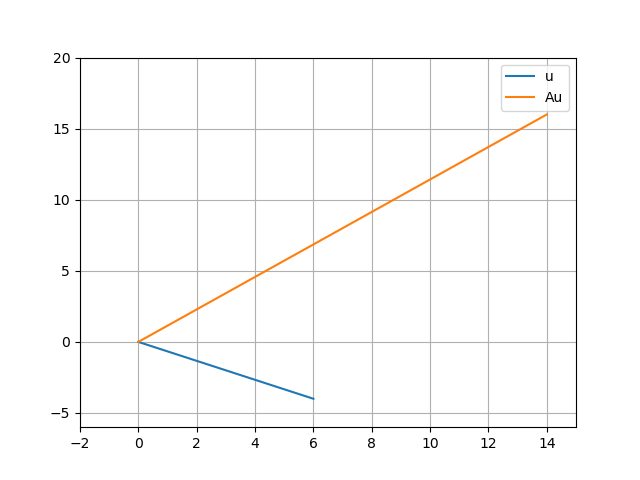

In [18]:
# define the vector. this is a row vector
u = np.array([6, -4]).T # SOL

# define the 2x2 matrix
A = np.array([[1, -2], [2, -1]]) # SOL 

# output vector is Av (convert v to column)
v = A @ u # SOL 


# plotting
plt.plot([0,u[0]],[0,u[1]],label='u')
plt.plot([0,v[0]],[0,v[1]],label='Au')
plt.grid()
plt.axis((-2, 15, -6, 20))
plt.legend()
plt.show()

<!-- END QUESTION -->

### Array Slicing: Accessing Subarrays

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the *slice* notation, marked by the colon (``:``) character.
The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array ``x``, use this:
``` python
x[start:stop:step]
```
If any of these are unspecified, they default to the values ``start=0``, ``stop=``*``size of dimension``*, ``step=1``.
We'll take a look at accessing sub-arrays in one dimension and in multiple dimensions.

In [19]:
M = np.random.randint(100, size=(10, 12))
print("Initial matrix: ")
print(M)

Initial matrix: 
[[10  9 44 99 72 45 98 64  6 55 30 15]
 [87 16 65 87 71 26 93 16 10 36 75 58]
 [12 38 24 17 67 53 46 30  2 49 38 23]
 [ 8 95 50 93 41 86  5 61 88 48 76 76]
 [96  0 45 88 86 43 85 51 85 90 72 36]
 [17 69 53 29 89 35 63 10 83 35 40 24]
 [81 73 94 55 23 34 39 13 91 10 85 10]
 [93 13 89 35 57 43 31 60 16 42  0 40]
 [12 92 52 17 12 79 85 19 23 13 65 51]
 [99 48 42 88  2 44 54 75 41 73 36 54]]


In [20]:
M[1,:] # se|cond row

array([87, 16, 65, 87, 71, 26, 93, 16, 10, 36, 75, 58])

In [21]:
M[:,1] # second column

array([ 9, 16, 38, 95,  0, 69, 73, 13, 92, 48])

In [22]:
# assignment can also work for rows and columns. This is really powerful and fast!
M[1,:] = 0
M

array([[10,  9, 44, 99, 72, 45, 98, 64,  6, 55, 30, 15],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [12, 38, 24, 17, 67, 53, 46, 30,  2, 49, 38, 23],
       [ 8, 95, 50, 93, 41, 86,  5, 61, 88, 48, 76, 76],
       [96,  0, 45, 88, 86, 43, 85, 51, 85, 90, 72, 36],
       [17, 69, 53, 29, 89, 35, 63, 10, 83, 35, 40, 24],
       [81, 73, 94, 55, 23, 34, 39, 13, 91, 10, 85, 10],
       [93, 13, 89, 35, 57, 43, 31, 60, 16, 42,  0, 40],
       [12, 92, 52, 17, 12, 79, 85, 19, 23, 13, 65, 51],
       [99, 48, 42, 88,  2, 44, 54, 75, 41, 73, 36, 54]])

In [23]:
M[:,2] = -1
M

array([[10,  9, -1, 99, 72, 45, 98, 64,  6, 55, 30, 15],
       [ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [12, 38, -1, 17, 67, 53, 46, 30,  2, 49, 38, 23],
       [ 8, 95, -1, 93, 41, 86,  5, 61, 88, 48, 76, 76],
       [96,  0, -1, 88, 86, 43, 85, 51, 85, 90, 72, 36],
       [17, 69, -1, 29, 89, 35, 63, 10, 83, 35, 40, 24],
       [81, 73, -1, 55, 23, 34, 39, 13, 91, 10, 85, 10],
       [93, 13, -1, 35, 57, 43, 31, 60, 16, 42,  0, 40],
       [12, 92, -1, 17, 12, 79, 85, 19, 23, 13, 65, 51],
       [99, 48, -1, 88,  2, 44, 54, 75, 41, 73, 36, 54]])

In [24]:
M[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([[10,  9, -1, 99, 72, 45, 98, 64,  6, 55, 30, 15],
       [12, 38, -1, 17, 67, 53, 46, 30,  2, 49, 38, 23],
       [96,  0, -1, 88, 86, 43, 85, 51, 85, 90, 72, 36],
       [81, 73, -1, 55, 23, 34, 39, 13, 91, 10, 85, 10],
       [12, 92, -1, 17, 12, 79, 85, 19, 23, 13, 65, 51]])

In [25]:
M[:3] # first three rows

array([[10,  9, -1, 99, 72, 45, 98, 64,  6, 55, 30, 15],
       [ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [12, 38, -1, 17, 67, 53, 46, 30,  2, 49, 38, 23]])

In [26]:
M[3:] # rows from row 3 to the end

array([[ 8, 95, -1, 93, 41, 86,  5, 61, 88, 48, 76, 76],
       [96,  0, -1, 88, 86, 43, 85, 51, 85, 90, 72, 36],
       [17, 69, -1, 29, 89, 35, 63, 10, 83, 35, 40, 24],
       [81, 73, -1, 55, 23, 34, 39, 13, 91, 10, 85, 10],
       [93, 13, -1, 35, 57, 43, 31, 60, 16, 42,  0, 40],
       [12, 92, -1, 17, 12, 79, 85, 19, 23, 13, 65, 51],
       [99, 48, -1, 88,  2, 44, 54, 75, 41, 73, 36, 54]])

In [27]:
# slice a block from the original array
M[1:4, 1:4]

array([[ 0, -1,  0],
       [38, -1, 17],
       [95, -1, 93]])

In [28]:
# slice with different strides
M[::2, ::2]

array([[10, -1, 72, 98,  6, 30],
       [12, -1, 67, 46,  2, 38],
       [96, -1, 86, 85, 85, 72],
       [81, -1, 23, 39, 91, 85],
       [12, -1, 12, 85, 23, 65]])

<!-- BEGIN QUESTION -->

# Implementing Gaussian Elimination
In this exercise we'll try to implement gaussian elimination.
First we create a couple of functions for elementry row operations.

Each of the elementary row operations is the result of matrix multiplication by an elementary matrix (on the left).

# Exercise 4
## Row Swap
For swapping row $i$ with row $j$ in a $m\times n$ matrix $A$, we multiply $A$ by an $m\times m$ matrix $E$ where $E$ is equal to the identity matrix $I_m$ except $E_{ii}=E_{jj}=0,$ and $E_{ij}=E_{ji}=1$. (Equivalently, we can interchange $i$-th row and $j$-th row of the identity matrix $I$ to get $E$.)
For example, if $A$ is a $3\times 3$ matrix and we would like to swap row $1$ with row $3$, then $E$ would be equal to:
  
  $$
   \begin{bmatrix} 0 & 0 & 1 \\ 0 & 1 & 0\\ 1 & 0 & 0 \end{bmatrix}
  $$
  
 Now try to define the `row_swap` function which take a matrix $A$ and two indices $i$ and $j$ as its inputs and returns a matrix which is equal to $A$ with its $i$-th row and $j$-th row swapped.

In [29]:
def row_swap(A, i, j):
    "Swap row i and j in matrix A."
    m = A.shape[0] # SOL 
    E = np.eye(m)
    # Fill out certain entries of E with proper numbers
    # For example:
    # E[i, i] = ?
    # ...
    
    # SOL # SOL # SOL 
    E[i, i] = 0
    E[j, j] = 0
    E[i, j] = 1
    E[j, i] = 1
    
    return np.around(E @ A, precision)

In [30]:
A = np.array([[1,2,3],[4,-5,6],[7,-8,9]])
print("Before row exchange:")
print(A)
print("After row exchange:")
print(row_swap(A, 1, 2))

Before row exchange:
[[ 1  2  3]
 [ 4 -5  6]
 [ 7 -8  9]]
After row exchange:
[[ 1.  2.  3.]
 [ 7. -8.  9.]
 [ 4. -5.  6.]]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Exercise 5
## Row Sum
 For summing $k \times$ row $i$ with row $j$ in a $m\times n$ matrix $A$, we multiply $A$ by the matrix $E$ where $E$  is equal to the identity matrix $I_m$ except $E_{ji}=k$. For example, if $A$ is 3 by 5 and we want to add -2 times $3$ to row $1$. then $E$ would be equal to:
  
   $$
   \begin{bmatrix} 1 & 0 & -2 \\ 0 & 1 & 0\\ 0 & 0 & 1 \end{bmatrix}
  $$

Now try to define the `row_sum` function which takes matrix $A$, scalar $k$ and indices $i, j$ as its inputs and returns the matrix resulting from adding $k$ times row $i$  to row $j$  in the matrix $A$.

In [31]:
# A simple exception for when the indices given to row_sum function are equal
class GERowSwapSameIndexException(Exception):
    def __init__(self):
        super().__init__("Error: indices given to the function must be different.")
        
def row_sum(A,k,i,j):
    "Add k times row i to row j in matrix A."
    if (i == j):
        raise GERowSwapSameIndexException
        
    m = A.shape[0]  # SOL 
    E = np.eye(m)   # SOL
    # Fill out certain entries of E with proper numbers
    # For example:
    # E[i, i] = ?
    #E[j, :] += k * E[i, :]
    # ... # SOL 
    
    # SOL# SOL# SOL# SOL
    E[j, i] = k 
    return np.around(E @ A, precision)

In [32]:
A = np.array([[1,2,3],[4,-5,6],[7,-8,9]])
print("Before row sum:")
print(A)
print("After row sum:")
print(row_sum(A, 2, 1, 2))

Before row sum:
[[ 1  2  3]
 [ 4 -5  6]
 [ 7 -8  9]]
After row sum:
[[  1.   2.   3.]
 [  4.  -5.   6.]
 [ 15. -18.  21.]]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Exercise 6

## Row Scale
For summing $k \times$ row $i$ with row $j$ in a $m\times n$ matrix $A$, we multiply $A$ by the matrix $E$ where $E$  is equal to the identity matrix $I_m$ except $E_{ii}=k$. For example, if $A$ is 4 by 3 and we want to multiply row 3 by -4 then $E$ would be equal to:
  
   $$
   \begin{bmatrix} 1 & 0 & 0 & 0\\ 0 & 1 & 0 &0\\ 0 & 0 & -4 &0 \\
       0&  0 &0 &1 \end{bmatrix}
  $$
The implementation of a function that scales a row of a matrix must be trivial by now. It take a matrix $A$, a scalar $k$ and an index $i$ and returns the matrix that results from  $k$ times row $i$ in the matrix $A$.

In [33]:
def row_scale(A,k,i):
    "Multiply row i by k in matrix A"
    m = A.shape[0] # SOL 
    E = np.eye(m)  # SOL 
    # Fill out certain entries of E with proper numbers
    # For example:
    # E[i, i] = ?
   # SOL# SOL# SOL# SOL# SOL
    E[i, i] = k
    return np.around(E @ A, precision)

In [34]:
A = np.array([[1,2,3],[4,-5,6],[7,-8,9]])
print("Before row scale:")
print(A)
print("After row scale:")
print(row_scale(A, -3, 1))

Before row scale:
[[ 1  2  3]
 [ 4 -5  6]
 [ 7 -8  9]]
After row scale:
[[  1.   2.   3.]
 [-12.  15. -18.]
 [  7.  -8.   9.]]


# Exercise 7

## Gaussian Elimination
Having defined the elementary row operations, now let's implement gaussian elimination.

Define the function `eliminate` which takes a matrix $A$ and a vector $b$ and applies gaussian elimination on them and then returns the resulting matrix and vector.

In [35]:
# A simple exception for when the indices given to row_sum function are equal
class GEEliminationErr(Exception):
    def __init__(self, msg):
        super().__init__(msg)
        
def is_zero(x, epsilon=1e-10):    
    return abs(x) < epsilon

def gaussian_elimination(A):
    number_rows = A.shape[0]
    try:
        for i in range(number_rows):
            pivot = A[i, i] #SOL ...
            
            if is_zero(pivot):
                swap_index = (np.where(A[i+1:,i] != 0)[0][0]) + i + 1
                A = row_swap(A, i, swap_index) # SOL 
                
            # Eliminate elements below the pivot
            loopRange = number_rows - 1 - i # SOL 
            for j in range(loopRange):
                multiplier = A[i+j+1, i] / A[i, i] # SOL  
                A = row_sum(A, -multiplier, i, i+j+1) # SOL 
                print("Row operation: ")
                print(A)
    
        if A[number_rows-1, number_rows-1] == 0:
            raise GEEliminationErr("Matrix is not full rank. There are no unique solution.")
    
    except IndexError as exc:
        raise GEEliminationErr("Pivot not found. There are no unique solutions.") from exc
    return A

In [36]:
# ADD A TEST
test = np.array([[3, 2, 1], [5, 8, 3], [1, 1, 5]])
gaussian_elimination(test)

Row operation: 
[[3.   2.   1.  ]
 [0.   4.67 1.33]
 [1.   1.   5.  ]]
Row operation: 
[[3.   2.   1.  ]
 [0.   4.67 1.33]
 [0.   0.33 4.67]]
Row operation: 
[[3.   2.   1.  ]
 [0.   4.67 1.33]
 [0.   0.   4.58]]


array([[3.  , 2.  , 1.  ],
       [0.  , 4.67, 1.33],
       [0.  , 0.  , 4.58]])

# Exercise 8

Next, implement the `back_substitution` function. This function solves a linear system of equations that has been transformed into reduced row-echelon form. It takes a matrix $A$ and a vector $b$ in their rref forms and returns the solution of $Ax=b$.

In [2]:
def back_substitution(A,b):
    n = A.shape[0]
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        tmp = b[i]
        for j in range(n-1, i, -1):
            tmp -= x[j]*A[i, j] # SOl 
        x[i] = tmp/A[i, i] # SOL 
    return np.around(np.matrix(x), precision)

In [1]:
# define an example matrix 
A = np.matrix([[1,2,3], [1,2,5], [3,9,7]], dtype = float)
print("Original Matrix")
print(A)

# define vector b
b = np.mat([2,3,1], dtype = float)
b = b.reshape(3,1)

Aug = np.concatenate((A, b), axis=1)
print("Augmented Matrix")
print(Aug)

# Applying the elimination
ref_Aug = gaussian_elimination(Aug)
# Extract everything BUT the last column of Aug
ref_A = ref_Aug[:, :-1].copy()
# Extract the last column of Aug
ref_b = ref_Aug[:, -1].copy()
print('rref a: ', ref_A)
print('rred b', ref_b)
z = back_substitution(ref_A, ref_b)
print("Final solution of system of equations is ")
print(z.T)

NameError: name 'np' is not defined

<!-- END QUESTION -->

## Color Grading
A digital image is a numerical representation of an image via a set of picture elements known as pixels. A digital image is an array, or a matrix, of square pixels (picture elements) arranged in
columns and rows. 
### Grayscale Images
In a (8-bit) greyscale image each picture element has an assigned intensity that
ranges from 0 to 255. A grey scale image is what people normally call a black and
white image, but the name emphasizes that such an image will also include many
shades of grey.

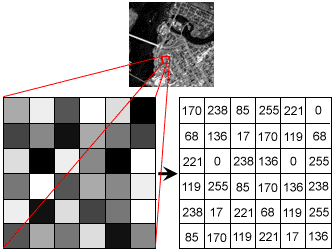

### RGB Images
The RGB colour model relates very closely to the way we perceive colour with the r,
g and b receptors in our retinas. RGB uses additive colour mixing and is the basic
colour model used in television or any other medium that projects colour with light.
It is the basic colour model used in computers and for web graphics.
The RGB color model is a method of describing colors. In this model each color is represented as a mixture of three basic colors: red, green, and blue. By varying intensities of these components a variety of colors can be obtained.

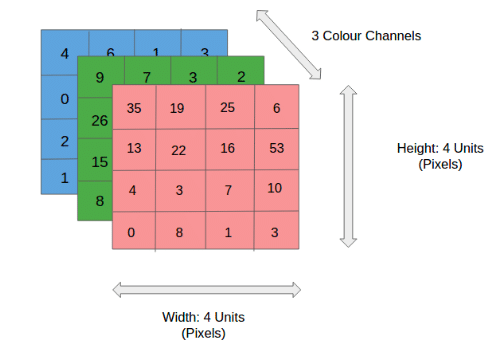


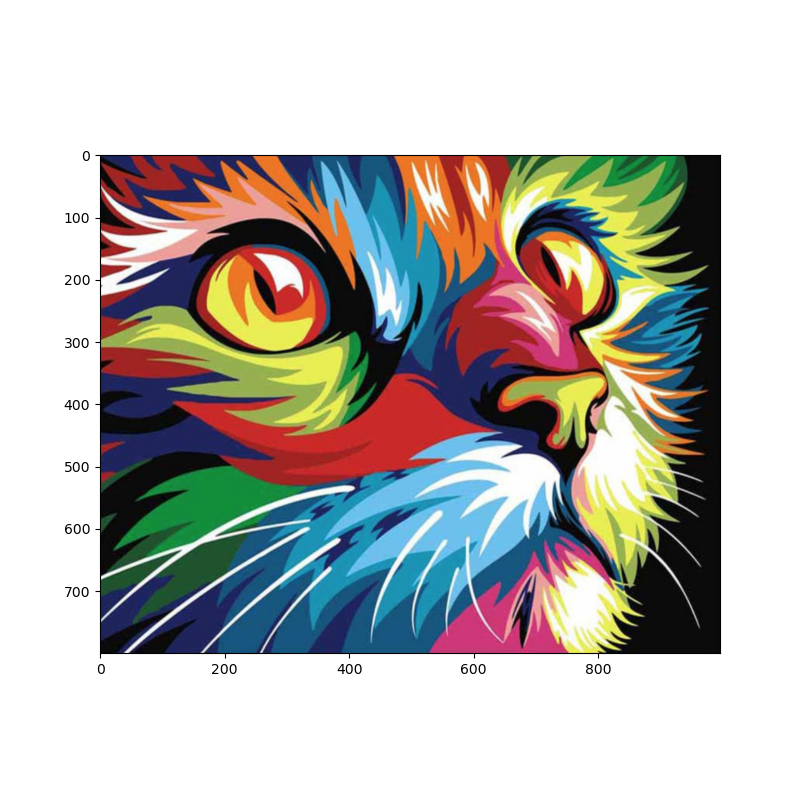

In [39]:
# import image
cat = plt.imread("images\cat.jpg")
plt.figure(figsize=(8,8))
plt.imshow(cat)
plt.show()

In [40]:
# Checkout the contents of the cat array
cat.shape, cat

((800, 996, 3),
 array([[[18, 34, 60],
         [24, 38, 67],
         [36, 42, 76],
         ...,
         [13, 13, 13],
         [12, 12, 12],
         [ 7,  7,  7]],
 
        [[17, 29, 55],
         [24, 33, 62],
         [35, 40, 72],
         ...,
         [13, 13, 13],
         [12, 12, 12],
         [ 7,  7,  7]],
 
        [[14, 20, 46],
         [23, 24, 52],
         [32, 31, 62],
         ...,
         [13, 13, 13],
         [12, 12, 12],
         [ 7,  7,  7]],
 
        ...,
 
        [[ 8,  8,  8],
         [ 8,  8,  8],
         [ 8,  8,  8],
         ...,
         [10, 10, 10],
         [10, 10, 10],
         [ 4,  4,  4]],
 
        [[ 7,  7,  7],
         [ 7,  7,  7],
         [ 7,  7,  7],
         ...,
         [13, 13, 13],
         [13, 13, 13],
         [ 8,  8,  8]],
 
        [[ 7,  7,  7],
         [ 7,  7,  7],
         [ 7,  7,  7],
         ...,
         [14, 14, 14],
         [13, 13, 13],
         [ 8,  8,  8]]], dtype=uint8))

The `color_grader` function works as follows. It takes as its arguments a 3x3 matrix $A$ and an array representing an image. For each image pixel it takes the vector 

$$\mathbf{v} = \begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}$$

with RGB coordinates of the pixel, and replaces it with the vector $A\mathbf{v}$, which specifies the new pixel color. Then it displays the image with colors given by the vectors $A\mathbf{v}$. Since valid RGB values are integers between 0 and 255, coordinates of each vector  𝐴𝐯  are rounded to the nearest integer in this range. In particular, if  𝐴𝐯  has negative coordinates they are rounded up to 0, and if it has coordinates exceeding 255 they are rounded down to 255.

Here is the implementation of the `color_grader` function:

In [41]:
def color_grader(A, img, width=8, height=8):
    A = np.array(A).astype(float)
    
    if img.dtype == 'uint8':
        img = img.astype(float)/255
    new_img = np.transpose(np.dot(A, np.transpose(img, axes = (0, 2, 1))), axes = (1, 2, 0))
    new_img[new_img < 0] = 0
    new_img[new_img > 1] = 1
    new_img = (255*new_img).astype('uint8')
    plt.figure(figsize=(width,height))
    plt.imshow(new_img)
    plt.show()

[[1.  0.  0.1]
 [1.  1.5 0.1]
 [0.1 0.3 1. ]]


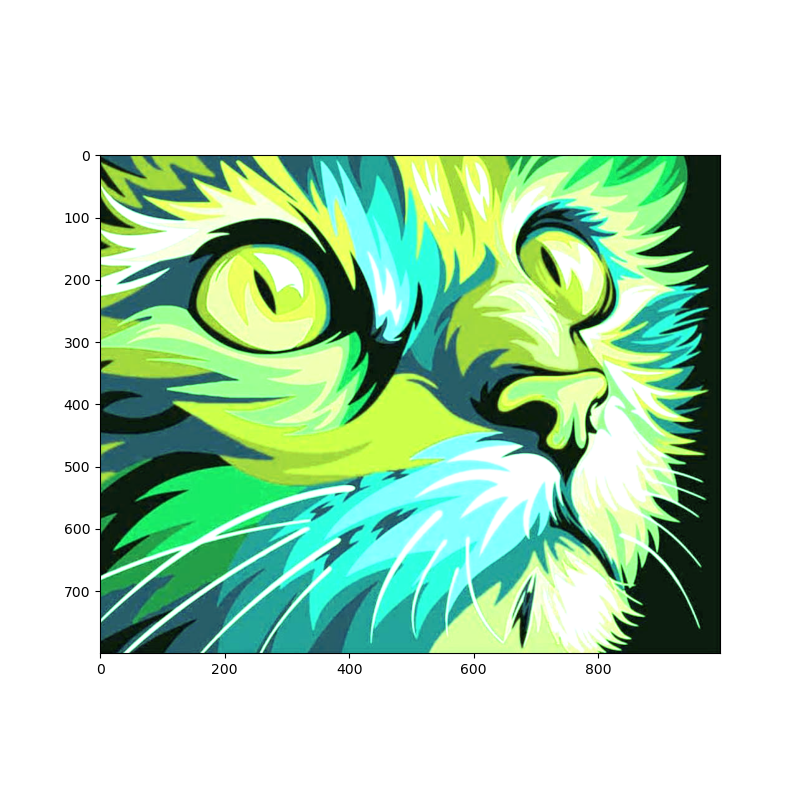

In [42]:
A = np.array([[1 , 0, 0.1], [1, 1.5, 0.1], [0.1, 0.3, 1]])
print(A)
color_grader(A, cat)

In each of the cases below find a $3\times 3$ matrix $A$ which transforms colors of image pixels as indicated. Use the function `color_grader` to display the resulting image of the balloon.

<!-- BEGIN QUESTION -->

# Exercise 9

The matrix leaves the blue component unchanged and sets the other components to 0:

$$A\begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}  = \begin{bmatrix} 0 \\ 0 \\ b \\ \end{bmatrix} $$

Matrix A:
[[0 0 0]
 [0 0 0]
 [0 0 1]]


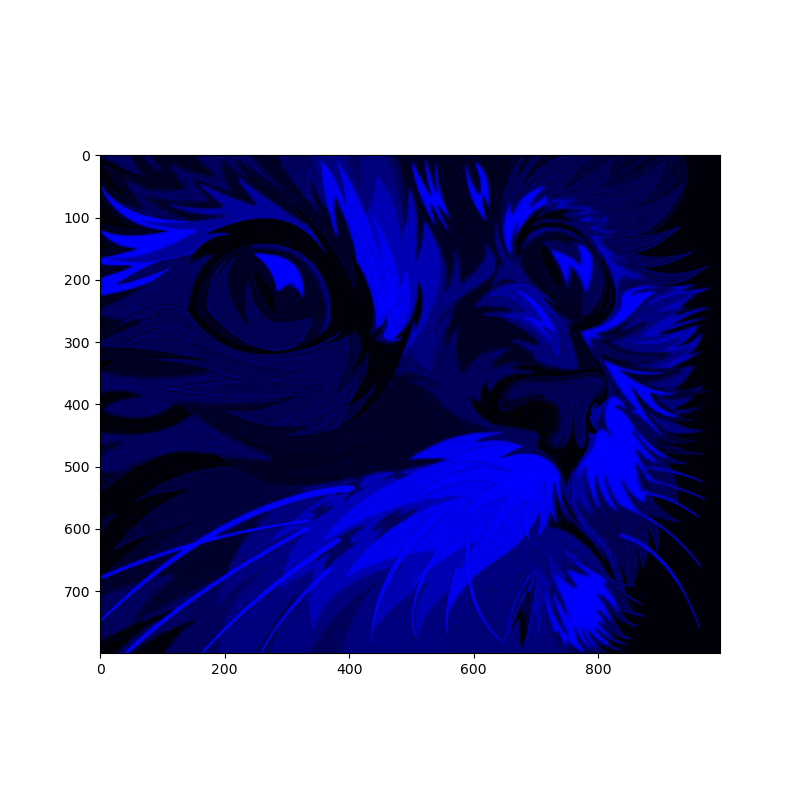

In [43]:
A = np.array([[0,0,0],[0,0,0],[0,0,1]]) # SOL  
print("Matrix A:")
print(A)
color_grader(A, cat)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Exercise 10

The matrix interchanges the blue component with the green component:

$$A\begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}  = \begin{bmatrix} r \\ b \\ g \\ \end{bmatrix} $$

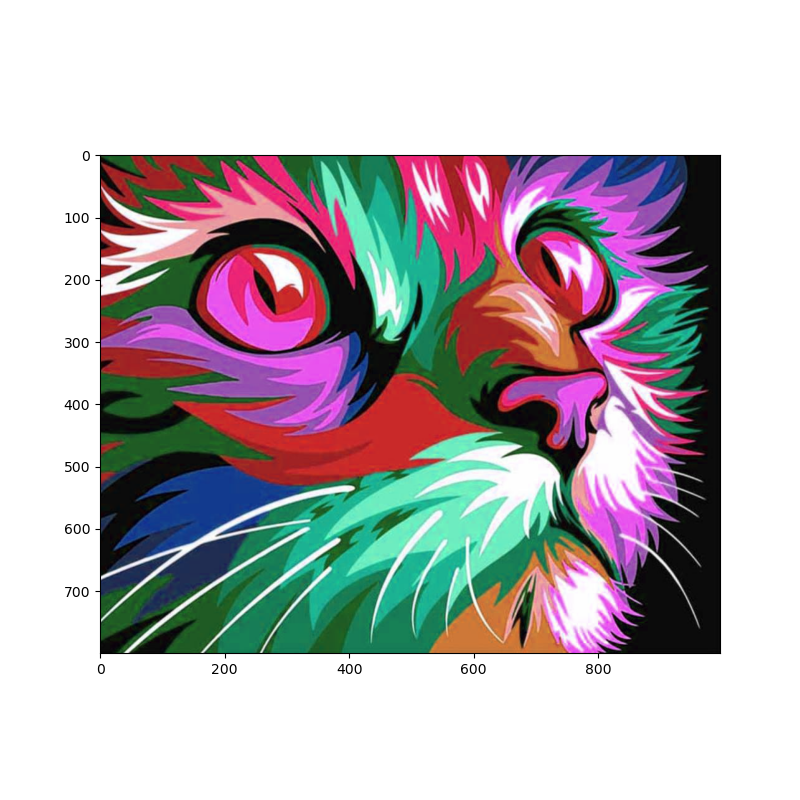

In [44]:
A = np.array([[1,0,0],[0,0,1],[0,1,0]]) # SOL 
color_grader(A, cat)

<!-- END QUESTION -->

There are a number of algorithms to convert colored images to grayscale images. In colored images each color pixel is described by a triple (R, G, B) of intensities for red, green, and blue, Here are two ways we map that to a single number giving a grayscale value.

- The average method simply averages the values: (R + G + B) / 3.
- The luminosity method is a more sophisticated version of the average method. It also averages the values, but it forms a weighted average to account for human perception. We’re more sensitive to green than other colors, so green is weighted most heavily. The formula for luminosity is 0.21 R + 0.72 G + 0.07 B.

<!-- BEGIN QUESTION -->

# Exercise 11


The matrix replaces all components by their average:

$$A\begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}  = \begin{bmatrix} \dfrac{r+g+b}{3} \\[1mm] \dfrac{r+g+b}{3} \\[1mm] \dfrac{r+g+b}{3} \\ \end{bmatrix} $$

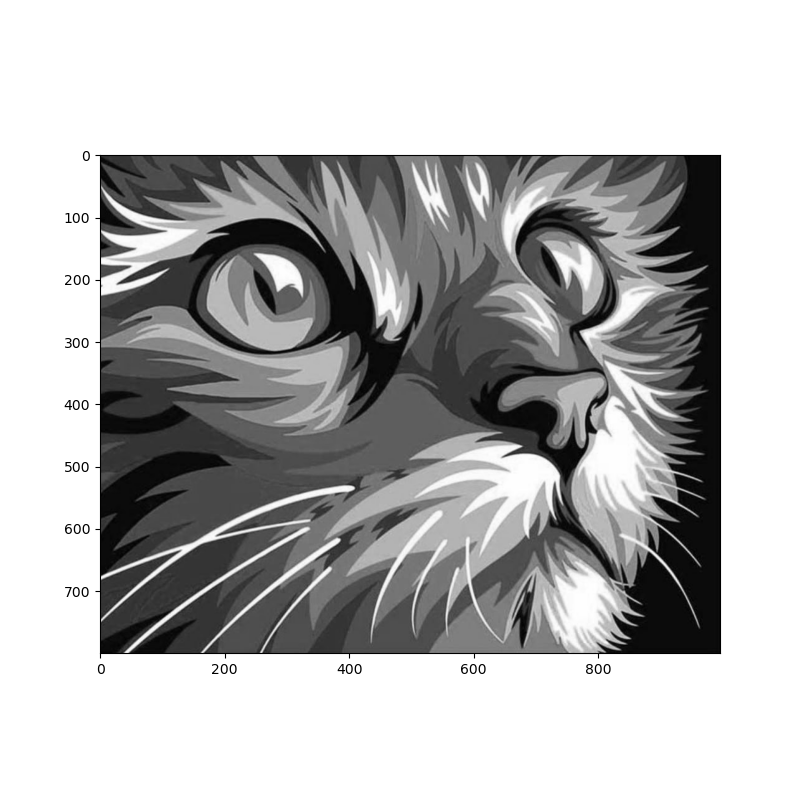

In [45]:
A = np.array([[1/3, 1/3, 1/3], [1/3, 1/3, 1/3], [1/3, 1/3, 1/3]])
color_grader(A, cat)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Exercise 12


The matrix replaces all components by their weighted average:

$$A\begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}  = \begin{bmatrix} 0.21 . r + 0.72 . g + 0.07 . b \\[1mm]0.21 . r + 0.72 . g + 0.07 . b \\[1mm] 0.21 . r + 0.72 . g + 0.07 . b \\ \end{bmatrix} $$

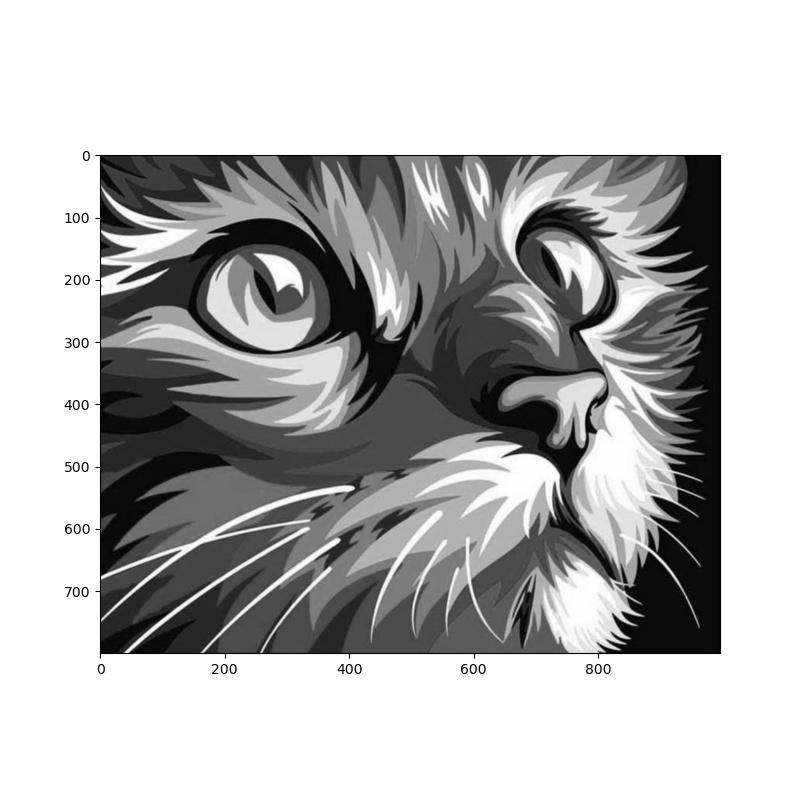

In [46]:
A = np.array([[0.21, 0.72, 0.07], [0.21, 0.72, 0.07], [0.21, 0.72, 0.07]])
color_grader(A, cat)

<!-- END QUESTION -->

# Linear Transformation
Matrices and vectors are used together to manipulate spatial dimensions. This has a lot of applications, including the mathematical generation of 3D computer graphics, geometric modeling, and the training and optimization of machine learning algorithms. A linear transformation is a function from one vector space to another that respects the underlying (linear) structure of each vector space. A linear transformation is also known as a linear operator or map. It takes a vector as input and transforms it into a new output vector. A function is said to be linear if the properties of additivity and scalar multiplication are preserved, that is, the same result is obtained if these operations are done before or after the transformation. Linear transformation is by far one of the most important concepts of linear algebra.

For example, consider a matrix A and vector v

$$
A\:=\:\begin{pmatrix}1&2\\ 3&4\end{pmatrix},\:v\:=\:\begin{pmatrix}-1\\ 2\end{pmatrix}
$$
Define transformation T to be:

$$T(v)=Av$$ 
This transformation is simply dot or inner product and give the following result:

$$T(v)=Av = \begin{pmatrix}1&2\\ 3&4\end{pmatrix}\begin{pmatrix}-1\\ 2\end{pmatrix}=\begin{pmatrix}3\\ 5\end{pmatrix}$$ 
In this case, both the input and output vector has 2 components. In other words, the transformation takes a 2-dimensional vector and produces a new 2-dimensional vector. Formally we can write this in the following way:

$$T:\mathbf{R}^2 \rightarrow \mathbf{R}^2$$
The transformation does not necessarily have to be $n \times n$. The dimension of the output vector and the input vector may differ. Rewrite our matrix A and vector v.

$$A = \begin{pmatrix}1&2\\ 3&4\\ 5&6\end{pmatrix}, v = \begin{pmatrix}-1\\ \:2\end{pmatrix}$$
Apply above transformation gives,

$$T(v)=Av = \begin{pmatrix}1&2\\ 3&4\\ 5&6\end{pmatrix}\begin{pmatrix}-1\\ 2\end{pmatrix}=\begin{pmatrix}3\\ 5\\ 7\end{pmatrix}$$ 
Now, our transformation transforms a vector from 2-dimensional space into 3-dimensional space. We can rite this transformation as

$$T:\mathbf{R}^2 \rightarrow \mathbf{R}^3$$

![image](images\linear-transformation-image.png)
### **Please watch videos 01 to 05 of *Essence of linear algebra by 3Blue1Brown*. They are available [here](https://vu.um.ac.ir/mod/folder/view.php?id=340624) in VU. (English and autogenerated Persian subtitles are included)**

One of the tangible applications of linear transformation is in geometry. A good way to understand the relationship between matrices and linear transformations is to actually visualize these transformations. To do that, we can use a grid of points in a two-dimensional space, each point corresponding to a vector (it is easier to visualize points instead of arrows pointing from the origin); In a picture, these points represent pixels.

# Geometric Transformation


Geometric transformations are one of the most common transformation operations that feature in any image processing pipeline. Examples of these transformations include: rotation, translation and scaling.

In [47]:
# This function takes a matrix and a transformation matrix and plots the result of transforming
# the columns of the first matrix with the given transformation matrix
# we will use it later to plot our transformations
def plot_transformation(A, transformation_matrix=np.eye(2)):
    product = A @ transformation_matrix
    size = (2, 2)
    plt.figure(figsize=(4, 4))
    plt.xlim(-size[0], size[0])
    plt.ylim(-size[1], size[1])
    plt.xticks(np.arange((-size[0]), size[0]+1, 1.0))
    plt.yticks(np.arange((-size[1]), size[1]+1, 1.0))
    plt.quiver([0, 0], [0, 0], product[0, :], product[1, :],
               angles='xy', scale_units='xy', scale=1,
               color=['red', 'blue'])
    plt.grid()
    plt.show()

### Rotation
A rotation matrix in $\mathbf{R}^2$ can be described by the following matrix: (it rotates the given vector by $\theta$ degrees)

![image.png](images/rotation_matrix.png)

The matrix R consists of two column vector which represent where our initial basis vectors end-up after the transformation.
To specify the coordinate vectors for the axes of frame o1 x1 y1 with respect to coordinate frame, o0 x0 y0 we need to put the cordinates of x1 with respect to frame o0 in the first column and the cordinates of y1 with respect to o0 in the second column of the transformation matrix. From the following figure and using basic geometry and keeping in mind that the length of x0, x1, y0, y1 is 1, we can see that the columns of the above rotation matrix are indeed the transformation that we are looking for.

![image](images/angle.png)

<!-- BEGIN QUESTION -->



In [48]:
A = np.array([
    [1, 0],
    [0, 1]
])

# Exercise 13
Find a rotation matrix that rotates the space by the given angle.

$\theta = 135^{\circ}$

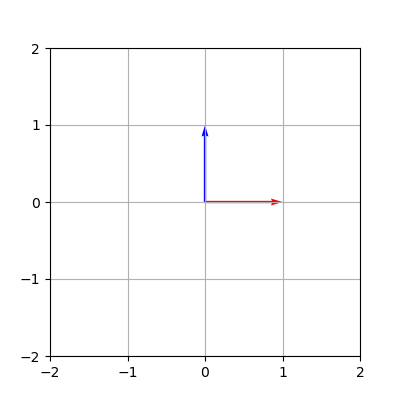

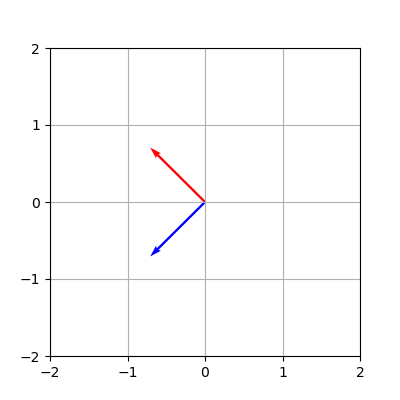

In [49]:
# rotate by 90 degrees
transformation_matrix = np.array([[np.cos(np.pi * (135/180)), -np.sin(np.pi * (135/180))], [np.sin(np.pi * (135/180)), np.cos(np.pi * (135/180))]]) # SOL 

# plot the original basis
plot_transformation(A)

# plot the rotated basis
plot_transformation(A, transformation_matrix)

$\theta = 60^{\circ}$

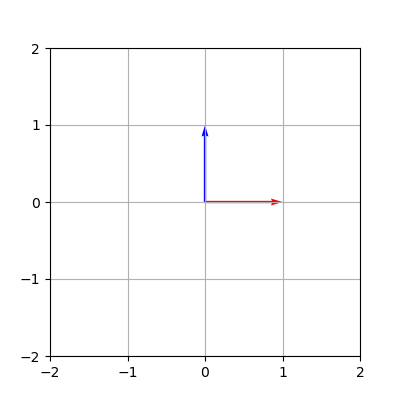

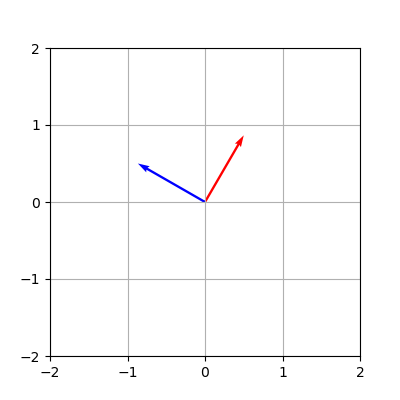

In [50]:
# rotate by 60 degrees
transformation_matrix = np.array([[np.cos(np.pi/3), -np.sin(np.pi/3)], [np.sin(np.pi/3), np.cos(np.pi/3)]]) # SOL 

# plot the original basis
plot_transformation(A)

# plot the rotated basis
plot_transformation(A, transformation_matrix)

<!-- END QUESTION -->

# Transforming Pictures
In the previous exercise we presented rotation matrices. Scaling, translation and shear can also be done with matrices. You will experiment with some of these transformations in this exercise.

In [51]:
# Given the transformation matrix, this function transforms a house using that matrix.
def transform_object_with(transformation_matrix):
    transformation_matrix = np.array(transformation_matrix).astype(np.float64)
    det_of_transformation_matrix = np.linalg.det(transformation_matrix)
    house_wall = np.array([[0, 0], [1, 0], [1, 1], [0, 1]]).T
    house_roof = np.array([[-0.1, 1], [0.1, 1.2], [0.1, 1.5],
                           [0.3, 1.5], [0.3, 1.4], [0.5, 1.6], [1.1, 1]]).T
    house_door = np.array([[0.1, 0], [0.4, 0], [0.4, 0.6], [0.1, 0.6]]).T
    house_window = np.array([[0.6, 0.3], [0.9, 0.3], [0.9, 0.6], [0.6, 0.6]]).T
    house = [(house_wall, 'goldenrod'), (house_roof, 'orangered'),
             (house_door, 'brown'), (house_window, 'lightcyan')]
    fig = plt.figure(figsize=(12, 4))
    fig.patch.set_alpha(0)
    plt.tight_layout()
    plt.style.use('seaborn')
    axis1 = plt.axes([0.05, 0.05, 0.35, 0.9])
    axis1.axis('equal')
    axis2 = plt.axes([0.6, 0.05, 0.35, 0.9])
    axis2.axis('equal')
    axis2.yaxis.tick_right()
    axis3 = plt.axes([0.45, 0.05, 0.1, 0.9])
    axis3.arrow(0, 0, 0.75, 0, width=0.02,
                head_width=0.06, head_length=0.2, fc='k')
    axis3.set_ylim(-1, 1)
    axis3.axis('off')
    x_max, y_max = 1.5, 1.5
    x_min, y_min = -1.5, -1.5
    n_house = []
    for (s, c) in house:
        ns = np.dot(transformation_matrix, s)
        n_house.append((ns, c))
        x_max = max(np.max(ns[0]), np.max(s[0]), x_max)
        y_max = max(np.max(ns[1]), np.max(s[1]), y_max)
        x_min = min(np.min(ns[0]), np.min(s[0]), x_min)
        y_min = min(np.min(ns[1]), np.min(s[1]), y_min)
        axis1.fill(*list(s), c)
        if np.array_equal(transformation_matrix, np.zeros((2, 2))):
            axis2.plot(*list(ns), 'o', color='orangered', ms=10)
        elif det_of_transformation_matrix == 0:
            axis2.plot(*list(ns), c, lw=4)
        else:
            axis2.fill(*list(ns), c)
    axis1.plot([0, 0], [y_min, y_max], 'k')
    axis1.plot([x_min, x_max], [0, 0], 'k')
    axis2.plot([0, 0], [y_min, y_max], 'k')
    axis2.plot([x_min, x_max], [0, 0], 'k')
    plt.show()

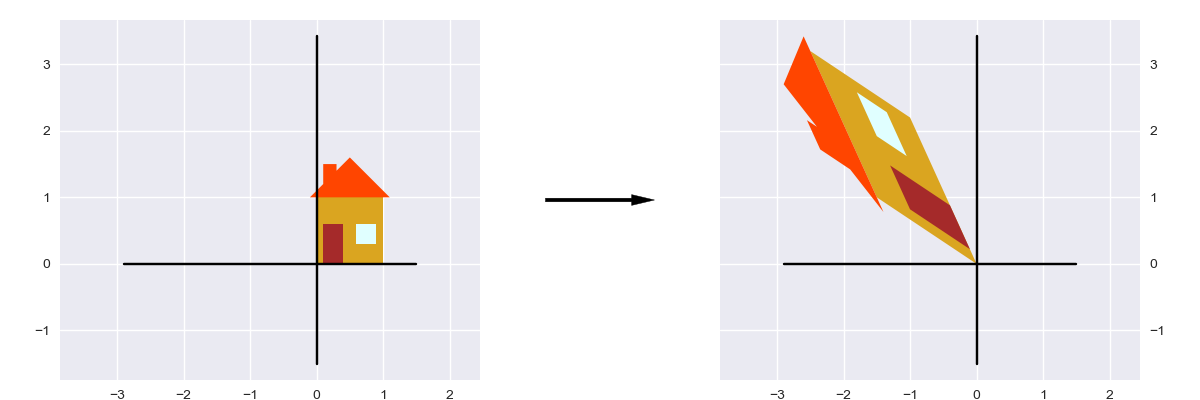

In [52]:
T = np.array([[-1, -1.5], [2.2, 1]])
transform_object_with(T)

<!-- BEGIN QUESTION -->

# Exercise 14
Find a transformation matrix that scales the object by a factor of 1.5. When this matrix is multiplied by a vector, it scales the vector by a factor of 1.5. What should you put in the columns of this transformation matrix?
![Alt text](images\Figure19.png)

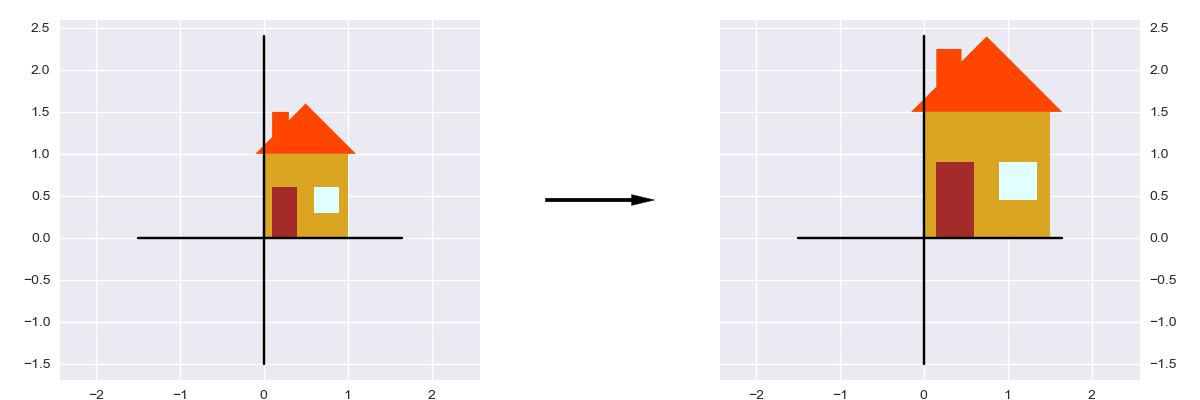

In [53]:
# Scale by a factor of 1.5
T = np.array([[1.5, 0],[0, 1.5]])
transform_object_with(T)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Exercise 15
Find a transformation matrix that rotates the object by 180 degrees and scales it by a factor of 0.5.
You can combine multiple transformation by simply multiplying the transformation matrices.
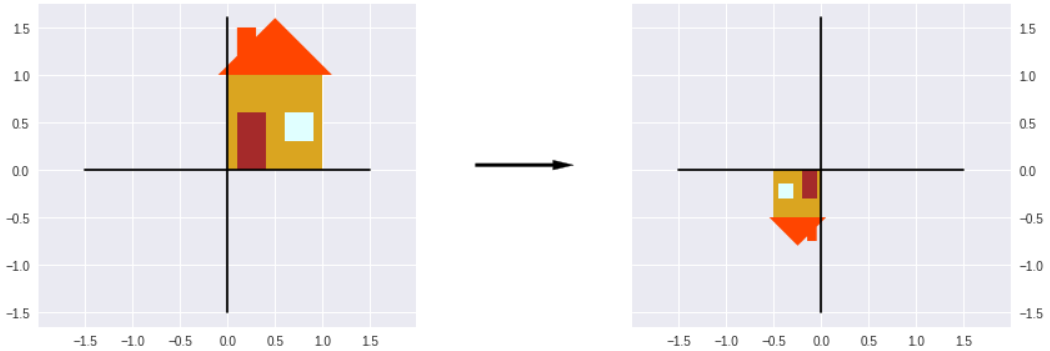

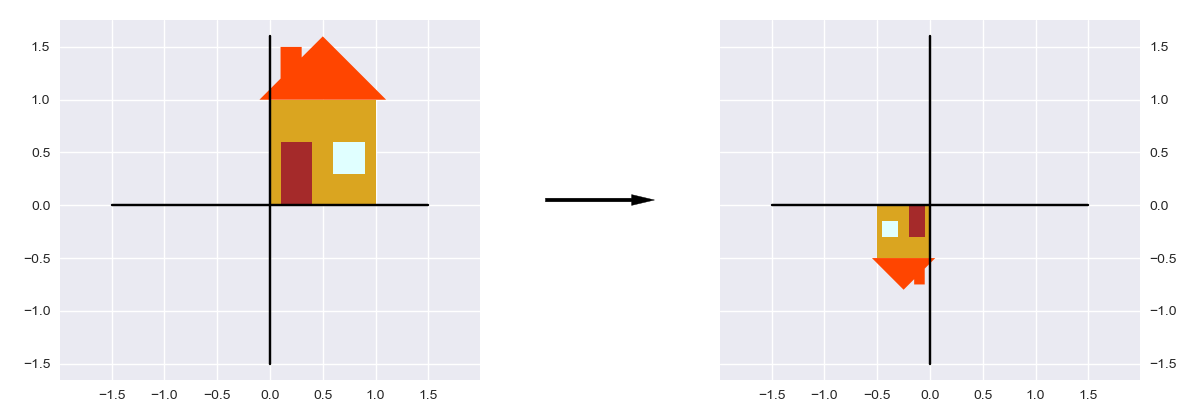

In [54]:
# Rotate 180 degrees and scale by a factor of 0.5
# First a rotation matrix
R = np.array([[np.cos(np.pi), -np.sin(np.pi)], [np.sin(np.pi), np.cos(np.pi)]])
# Then a scaling matrix
S = np.array([[0.5, 0], [0, 0.5]])
# combine the above two matrices
T = R @ S
transform_object_with(T)

# Orthogonal matrices and 3D graphics
Recall that the square matrix $Q$ is called orthogonal if $Q^T Q = Q Q^T = I$, where $I$ is an identity matrix of the same size as $Q$. In other words, this means that $Q^T = Q^{-1}$. Rows(columns) of an orthogonal matrix generate an orthonormal set of vectors.

Another property of orthogonal matrices is that $x.y = Qx.Qy$ for any two vectors $x$ and $y$,
meaning that multiplication by an orthogonal matrix $Q$ does not change the scalar product of
two vectors. 

Geometrically, this means that a linear transformation $T(x) = Qx $ of the space $ R^n$ is equivalent to the rotation of the space together with a possible re
ection along some hyperplane.
Whether a reflection of the space is involved can be seen by looking at the determinant of the
matrix $Q$. If $det(Q) = 1$, then the transformation is a pure rotation. If $det(Q) = -1$, then the transformation is a rotation together with a reflection.

Orthogonal matrices can be used in 3D graphics. Let us consider a three-dimensional object
which we want to show on a computer screen. The obvious diffculty is that the object is threedimensional
and the screen is only two-dimensional. Thus, we need to generate a projection to
show the object on the screen. One of the easiest ways to do this is to simply drop one of the
coordinates. However, that allows us to view the object only from three different angles which
can make it diffcult to understand the real shape of the object. Using orthogonal matrices
allows us to look at the object from many different angles. To accomplish this, we need three
matrices which represent rotations around each of the coordinate axes $Ox, Oy,$ and $Oz$:

$$
R_x = \begin{bmatrix}
1 & 0 & 0 \\
0 & cos \theta_{x} & -sin \theta_{x} \\ 
0 & sin \theta_{x} & cos \theta_{x}
\end{bmatrix}
$$

$$
R_y = \begin{bmatrix}
cos \theta_{y} & 0 & -sin \theta_{y} \\
0 & 1 & 0 \\ 
sin \theta_{y} & 0 & cos \theta_{y}
\end{bmatrix}
$$

$$
R_z = \begin{bmatrix}
cos \theta_{z} & -sin \theta_{z} & 0 \\
sin \theta_{z} & cos \theta_{z} & 0 \\ 
0 & 0 & 1
\end{bmatrix}
$$

Here $\theta_x, \theta_y$, and $\theta_z$ are the angles of rotation around the axes $Ox, Oy$, and $Oz$ correspondingly
in the counterclockwise direction. Multiplying these matrices will result in a combined rotation
around all three axes:
$$
R = R_x \; R_y \; R_z
$$

# Exercise 16
implement the `get_rotmat` function that gets $\theta_x, \theta_y, \theta_z$ as input and returns the rotation matrix $R$ (explained above):

In [55]:
def get_rotmat(t1, t2, t3):
    Rx = np.array([[1, 0, 0], [0, np.cos(t1), -np.sin(t1)], [0, np.sin(t1), np.cos(t1)]]) # SOL
    
    Ry = np.array([[np.cos(t2), 0, -np.sin(t2)], [0, 1, 0], [np.sin(t2), 0, np.cos(t2)]]) # SOL
    
    Rz = np.array([[np.cos(t3), -np.sin(t3), 0], [np.sin(t3), np.cos(t3), 0], [0, 0, 1]]) # SOL
    
    
    R = Rx @ Ry @ Rz  # SOL
   
    return R

In computer graphics, most objects are not actually smooth, but rather represented by
a polytope. In other words, they are obtained by identifying vertices on the surface of an
object and connecting those vertices with straight lines (edges). Thus, the surface of an object
actually consists of flat
 faces. In 3D graphics the faces are usually triangular. There is a simple
mathematical reason for this: there always exists a plane passing through any three points in a
space but not necessary through four or more points. If the number of faces is large, then the
object observed from far away appears to be smooth.

Two things are necessary to create a three-dimensional computer model of an object: coordinates
of the vertices and the edges showing the connections between the vertices. The former
can be given in a form of an $n \times 3 $ array $verts$ , where $n$ is the number of vertices in a 3D model.
The latter can be given in several different ways, for instance, by an $n \times n$ adjacency matrix $edges$
(hence, a 3D model can be treated as a graph!) or by an $ m \times 3$  array containing numbers of
vertices in each face of the model where $m$ is the number of faces. Here We will only look at the second representation (by using $m \times 3$ matrix called $faces$).

in the following exercises, we will first show the 3d object "star prism" with no rotation, then we will use the `get_rotmat` function to create the rotation matrix $R$ and rotate the vertices of the star prism and plot the rotated star.

In [56]:
# this function returns vertices and faces of the star prism
# verts is an array of shape (V, 3) where V is the number of vertices in the 3d object.
# faces is an array of shape (m, 3) where m is the number of faces.
# 3d model at https://www.cgtrader.com/free-3d-models/architectural/decoration/star--4
# was used to get the verts and faces array
# (also pytorch3d.io.load_obj() function was used to convert .obj file into arrays)
# (you can use pytorch3d.io.load_obj() to get verts and faces arrays of any .obj file and rotate it using functions in these exercises)
def get_star_prism():
       faces = np.array([
              [ 0,  1,  2],
              [ 3,  2,  4],
              [3, 6, 8],
              [7, 8, 9],
              [0, 5, 7],
              [10, 11, 12],
              [10, 13, 14],
              [13, 18, 17],
              [16, 19, 18],
              [12, 15, 16],
              [ 6, 17, 18],
              [ 6, 18,  8],
              [13, 17,  6],
              [13,  6,  3],
              [14, 13,  3],
              [14,  3,  4],
              [14,  4,  2],
              [14,  2, 10],
              [11, 10,  2],
              [11,  2,  1],
              [12, 11,  1],
              [12,  1,  0],
              [12,  0,  5],
              [12,  5, 15],
              [ 7, 16, 15],
              [ 7, 15,  5],
              [19, 16,  7],
              [19,  7,  9],
              [ 8, 18, 19],
       [ 8, 19,  9]
       ])
       verts = np.array([
              [-2.4132e+01,  9.9645e+01,  9.5000e+00],
              [-7.8093e+01,  9.1804e+01,  9.5000e+00],
              [-3.9047e+01,  5.3743e+01,  9.5000e+00],
              [-2.0000e-04,  2.5374e+01,  9.5000e+00],
              [-4.8264e+01,  0.0000e+00,  9.5000e+00],
              [-2.0000e-04,  1.4854e+02,  9.5000e+00],
              [ 4.8264e+01,  0.0000e+00,  9.5000e+00],
              [ 2.4132e+01,  9.9645e+01,  9.5000e+00],
              [ 3.9046e+01,  5.3743e+01,  9.5000e+00],
              [ 7.8093e+01,  9.1804e+01,  9.5000e+00],
              [-3.9047e+01,  5.3743e+01, -9.5000e+00],
              [-7.8093e+01,  9.1804e+01, -9.5000e+00],
              [-2.4132e+01,  9.9645e+01, -9.5000e+00],
              [-2.0000e-04,  2.5374e+01, -9.5000e+00],
              [-4.8264e+01,  0.0000e+00, -9.5000e+00],
              [-2.0000e-04,  1.4854e+02, -9.5000e+00],
              [ 2.4132e+01,  9.9645e+01, -9.5000e+00],
              [ 4.8264e+01,  0.0000e+00, -9.5000e+00],
              [ 3.9046e+01,  5.3743e+01, -9.5000e+00],
              [ 7.8093e+01,  9.1804e+01, -9.5000e+00]
       ])
       return verts, faces


In [57]:
# this function gets the "verts" and "faces" array of a 3d model and plots it using matplotlib plot3D function
def plot_3d(verts, faces):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    
    nFaces = faces.shape[0]
    mFaces = faces.shape[1]

    for curr_face in range(nFaces):
        for i in range(mFaces):
            for j in range(i):
                point1 = verts[faces[curr_face][i]] 
                point2 = verts[faces[curr_face][j]] 
 
                ax.plot3D([point1[0], point2[0]], 
                            [point1[1], point2[1]], 
                            [point1[2], point2[2]], 'red')
                
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()

Lets plot the star prism model with no rotation:

(plotted figure should be interactive, move the mouse around to see the model from different angles)

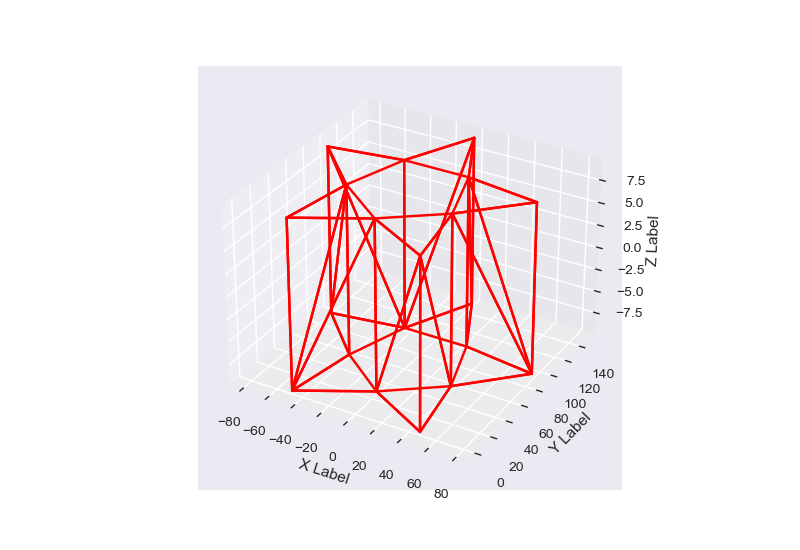

In [58]:
verts, faces = get_star_prism()
plot_3d(verts, faces)

# Exercise 17
rotate the star prism 90 degrees along x-axis:

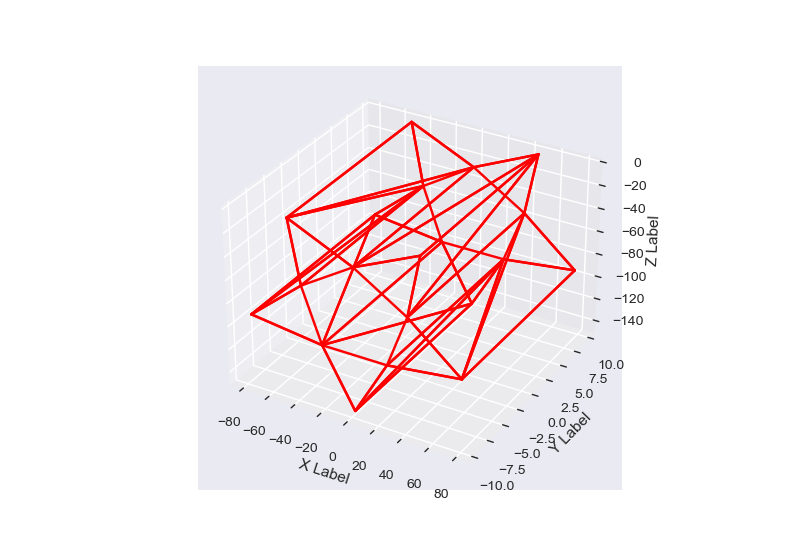

In [59]:
verts, faces = get_star_prism()
tx = np.pi/2 # SOL 
ty = 0 # SOL 
tz = 0 # SOL 
rotmat = get_rotmat(tx, ty, tz)
rotated_vertices = verts @ rotmat # SOL 
plot_3d(rotated_vertices, faces)

# Exercies 18
rotate the star prism 90 degrees along x-axis and 45 degrees along y-axis:

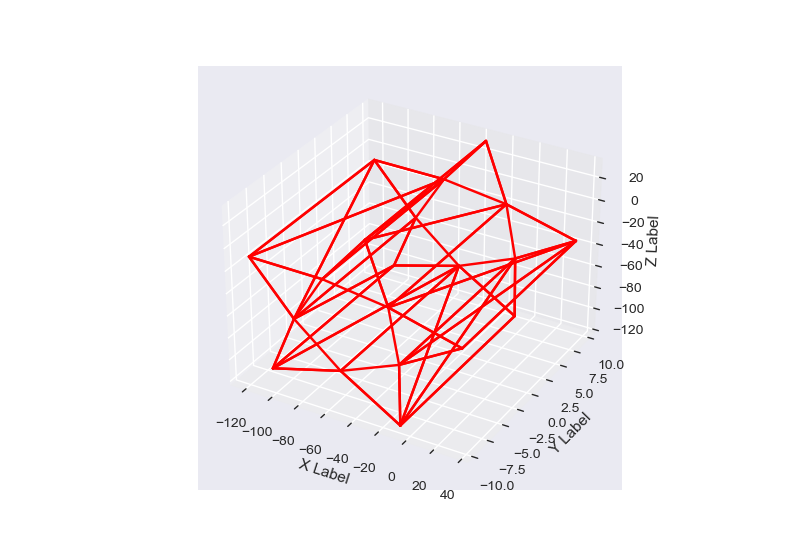

In [60]:
verts, faces = get_star_prism()
tx = np.pi/2 # SOL 
ty = np.pi/4 # SOL 
tz = 0 # SOL 
rotmat = get_rotmat(tx, ty, tz)
rotated_vertices = verts @ rotmat # SOL 
plot_3d(rotated_vertices, faces)

# Exercise 19

rotate the star prism 60 degrees along x-axis, 45 degrees along y-axis and 30 degree along z-axis:

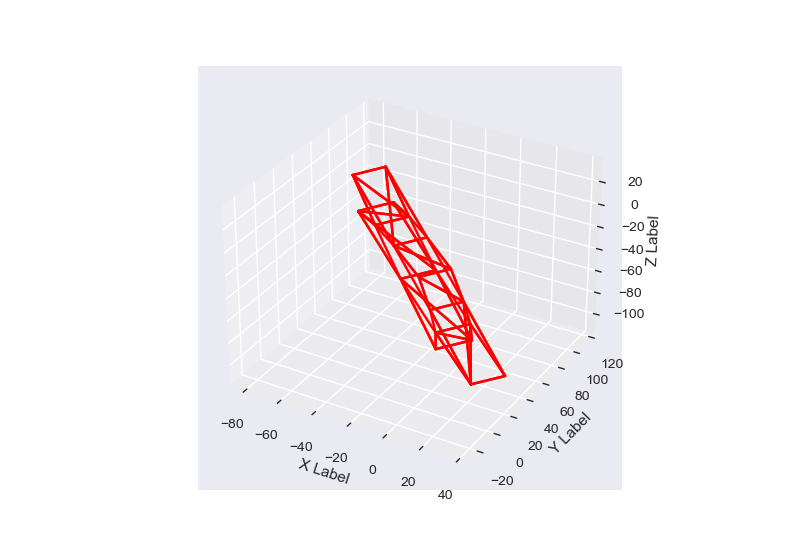

In [61]:
verts, faces = get_star_prism()
tx = np.pi/3 # SOL 
ty = np.pi/4 # SOL 
tz = np.pi/6 # SOL 
rotmat = get_rotmat(tx, ty, tz)
rotated_vertices = verts @ rotmat # SOL 
plot_3d(rotated_vertices, faces)

<!-- END QUESTION -->

> This document was compiled, gathered and coded by the teaching assistant team and may be used only for educational purposes. The authors would like to thank the many projects and educational material that made their source code freely available on the internet, especially otter-grader that made the generation and sanitization of the notebook easier.